# Avoiding Overfitting Through Regularization

Regularization is the process of adding information in order to solve an ill-posed problem or to prevent overfitting. Regularization can be applied to objective functions in ill-posed optimization problems.



# L1 Regularization | Lasso | Least Absolute:
$j_n(\theta ) = j_0(\theta ) + \alpha \sum_{i=1}^{m}\left | \theta_i \right |$

# L2 Regularization | Ridge
$j_n(\theta ) = j_0(\theta ) + \frac{\alpha}{2} \sum_{i=1}^{m}(\theta_i)^2$


# L1 - L2 Regularization 
$j_n(\theta ) = j_0(\theta ) + r\alpha \sum_{i=1}^{m}\left | \theta_i \right | + \frac{(1-r)}{2} \alpha \sum_{i=1}^{m}(\theta_i)^2$


# Dropout:
[Refer the paper](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)

## $\ell_1$ and $\ell_2$ regularization

In [3]:
# importing libraries

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [5]:
mnist = tf.keras.datasets.mnist
mnist

<module 'keras.api.datasets.mnist' from 'C:\\Users\\karth\\anaconda3\\Lib\\site-packages\\keras\\api\\datasets\\mnist\\__init__.py'>

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [9]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
X_train_full.shape

(60000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

In [15]:
X_train_full[0].shape

(28, 28)

In [17]:
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [19]:
len(X_train_full[5000:])

55000

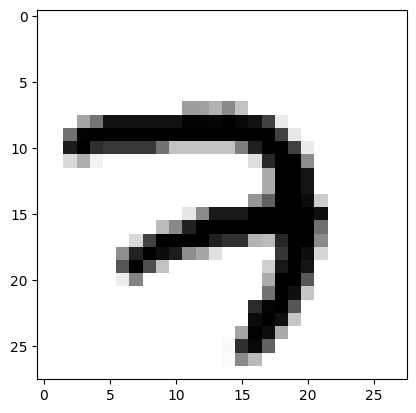

In [21]:
plt.imshow(X_train[0], cmap='binary')
plt.show()

<Axes: >

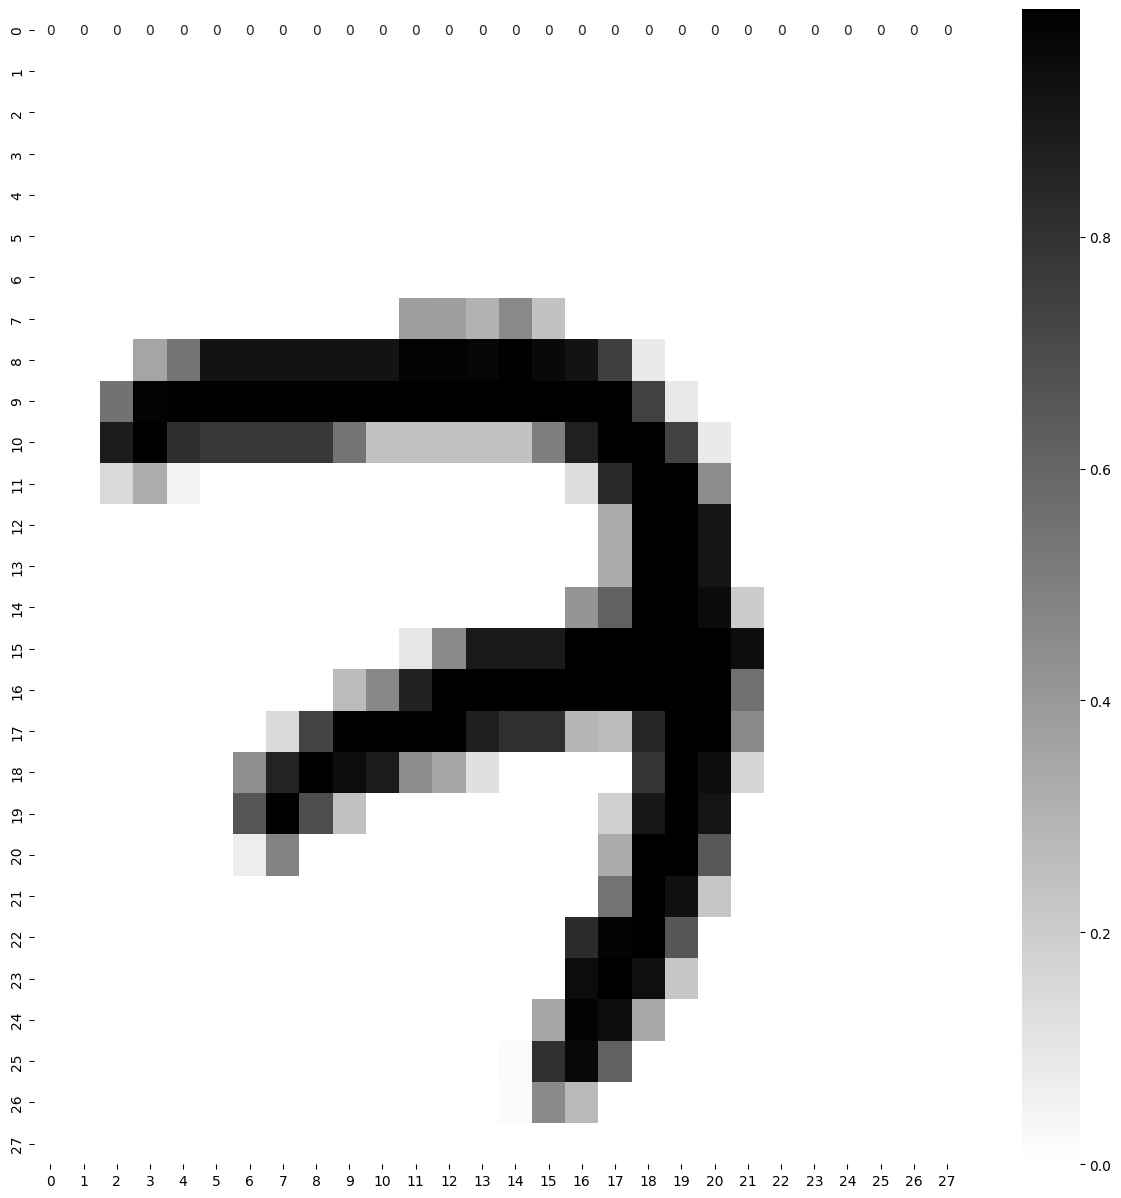

In [23]:
plt.figure(figsize=(15, 15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [31]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

# Creating layers
LAYERS = [
    tf.keras.layers.Flatten(input_shape = [28, 28], name="inputLayer"),
    tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1", kernel_regularizer=regularizers.L2(1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2",),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")
]

model = tf.keras.models.Sequential(LAYERS)

In [27]:
# Method 2

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Define the model
model = Sequential()
model.add(Flatten(input_shape=[28, 28], name="inputLayer"))
model.add(Dense(units=64, activation='relu', kernel_regularizer=regularizers.L2(1e-4)))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.2))
model.add(Dense(units=16, activation='relu', kernel_regularizer=regularizers.L1(1e-5)))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

In [35]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,018 (207.10 KB)

 Trainable params: 53,018 (207.10 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER ='SGD'
METRICS = ["accuracy"]

model.compile(loss = LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

In [39]:
EPOCHS = 5
VALIDATION_SET = (X_valid, y_valid)

history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION_SET, batch_size=32)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 864us/step - accuracy: 0.3711 - loss: 1.8022 - val_accuracy: 0.8664 - val_loss: 0.5930
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - accuracy: 0.7246 - loss: 0.8657 - val_accuracy: 0.9088 - val_loss: 0.3869
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - accuracy: 0.7984 - loss: 0.6756 - val_accuracy: 0.9294 - val_loss: 0.3138
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - accuracy: 0.8336 - loss: 0.5771 - val_accuracy: 0.9344 - val_loss: 0.2697
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - accuracy: 0.8533 - loss: 0.5188 - val_accuracy: 0.9392 - val_loss: 0.2499


In [41]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.516855,1.432783,0.8664,0.593049
1,0.748273,0.807009,0.9088,0.386900
2,0.808764,0.644924,0.9294,0.313766
3,0.840218,0.559931,0.9344,0.269652
4,0.858036,0.503898,0.9392,0.249864


<Axes: >

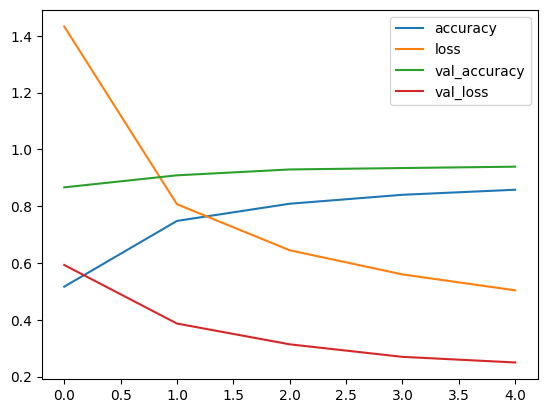

In [43]:
pd.DataFrame(history.history).plot()

## Max-Norm Regularization

In [ ]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01),
                           kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
# n_epochs = 2
# history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
#                     validation_data=(X_valid_scaled, y_valid))

In [ ]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_14 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Dropout

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
# n_epochs = 2
# history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
#                     validation_data=(X_valid_scaled, y_valid))

In [ ]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 300)               235500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               30100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)               